- Each of the 12 EKG leads represent a different direction of cardiac activation in 3-D space. The standard EKG leads are denoted as lead I, II, III, aVF, aVR, aVL, V1, V2, V3, V4, V5, V6. Leads I, II, III, aVR, aVL, aVF are denoted the limb leads while the V1, V2, V3, V4, V5, and V6 are precordial leads.

- Arrythmia is a problem with the rate of rhythm of your heartbeat. Heart may beat too quickly, too slowly, or with an irregular rhythm.
- Frequency irregular rhythm may mean that heart is not pumping enough blood to body.
- Can cause stroke, heart failure or cardiac arrest.

### Heartbeat types (according to the dataset)

- A: Atrial premature beat
- E: Ventricular escape beat
- F: Fusion beat
- J: Junctional premature beat
- L: Left bundle branch block beat
- N: Normal sinus beat
- Q: Unclassifiable beat
- R: Right bundle branch block beat
- S: Supraventricular ectopic beat
- V: Ventricular ectopic beat (PVCC)
- a: Aberrated atrial premature beat
- e: Atrial escape beat
- f: Fusion of ventricular and normal beat
- j: Junctional escape beat
- x: Non-conducted P-wave (blocked PAC)

In [1]:
import numpy as np
import wfdb


records = ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109',
           '111', '112', '113', '114', '115', '116', '117', '118', '119', '121',
           '122', '123', '124', '200', '201', '202', '203', '205', '207', '208',
           '209', '210', '212', '213', '214', '215', '217', '219', '220', '221',
           '222', '223', '228', '230', '231', '232', '233', '234']

# valid_types = ['A', 'E', 'F', 'J', 'L', 'N', 'Q', 'R', 'S', 'V', 'a', 'e', 'f', 'j', 'x']

X = []
y = []

window = int(0.5 * 360)


for rec in records:

    record = wfdb.rdrecord(rec, pn_dir='mitdb')
    annotation = wfdb.rdann(rec, 'atr', pn_dir='mitdb')

    signal = record.p_signal[:, 0]

    for i, r in enumerate(annotation.sample):
        if r - window < 0 or r + window > len(signal):
            continue
        segment = signal[r - window : r + window]
        label = annotation.symbol[i]
        # if label in valid_types:
        X.append(segment)
        y.append(label)

X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(112544, 360) (112544,)


In [2]:
l = np.unique(y)
print(len(l))

23


In [3]:
print(np.unique_counts(y))

UniqueCountsResult(values=array(['!', '"', '+', '/', 'A', 'E', 'F', 'J', 'L', 'N', 'Q', 'R', 'S',
       'V', '[', ']', 'a', 'e', 'f', 'j', 'x', '|', '~'], dtype='<U1'), counts=array([  472,   437,  1246,  7023,  2546,   106,   802,    83,  8071,
       75011,    33,  7255,     2,  7129,     6,     6,   150,    16,
         982,   229,   193,   132,   614]))


In [4]:
l

array(['!', '"', '+', '/', 'A', 'E', 'F', 'J', 'L', 'N', 'Q', 'R', 'S',
       'V', '[', ']', 'a', 'e', 'f', 'j', 'x', '|', '~'], dtype='<U1')

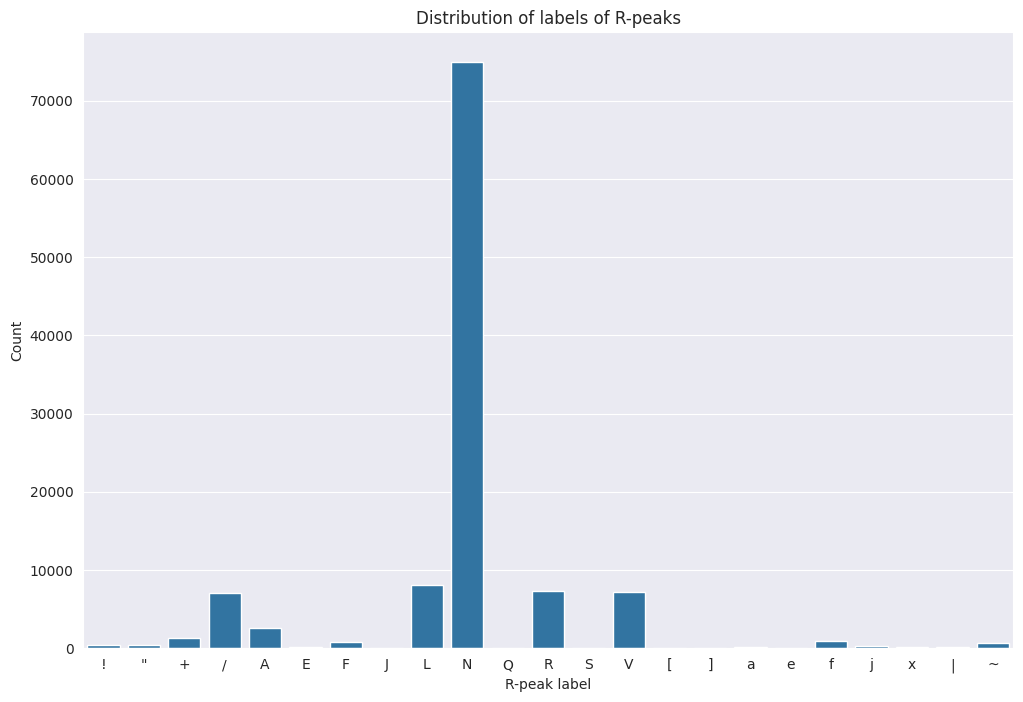

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.countplot(x = y, order = l)
plt.title("Distribution of labels of R-peaks")
plt.xlabel("R-peak label")
plt.ylabel("Count")
plt.show()

In [6]:
### First record : 100
for rec in records:
    record = wfdb.rdrecord(rec, pn_dir='mitdb')
    annotation = wfdb.rdann(rec, 'atr', pn_dir='mitdb')

    signal = record.p_signal[:, 0]
    labels = []

    for i, r in enumerate(annotation.sample):
        if r - window < 0 or r + window > len(signal):
            continue
        label = annotation.symbol[i]
        labels.append(label)

    labels = np.array(labels)
    print(len(labels))

2271
1872
2189
2089
2308
2690
2097
2138
1822
2532
2132
2547
1793
1889
1959
2419
1537
2299
2093
1873
2476
1517
1632
2790
2037
2145
3105
2670
2383
3037
3050
2682
2761
3291
2294
3397
2279
2312
2066
2461
2631
2641
2139
2464
2009
1815
3149
2762


In [7]:
import numpy as np

In [8]:
no_of_R_peaks_in_each_rec = np.array([2271,1872,2189,2089,2308,2690,2097,2138,1822,2532,2132,2547,1793,1889,1959,2419,1537,2299,2093,1873,2476,1517,1632,2790,2037,2145,3105,2670,2383,3037,3050,2682,2761,3291,2294,3397,2279,2312,2066,2461,2631,2641,2139,2464,2009,1815,3149,2762])
bpm = (no_of_R_peaks_in_each_rec/1800) * 60
print(bpm)


[ 75.7         62.4         72.96666667  69.63333333  76.93333333
  89.66666667  69.9         71.26666667  60.73333333  84.4
  71.06666667  84.9         59.76666667  62.96666667  65.3
  80.63333333  51.23333333  76.63333333  69.76666667  62.43333333
  82.53333333  50.56666667  54.4         93.          67.9
  71.5        103.5         89.          79.43333333 101.23333333
 101.66666667  89.4         92.03333333 109.7         76.46666667
 113.23333333  75.96666667  77.06666667  68.86666667  82.03333333
  87.7         88.03333333  71.3         82.13333333  66.96666667
  60.5        104.96666667  92.06666667]


## Experiment on record 100

In [9]:

import wfdb
import matplotlib.pyplot as plt

# Load signal and annotation from record 100
record = wfdb.rdrecord('100', pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')

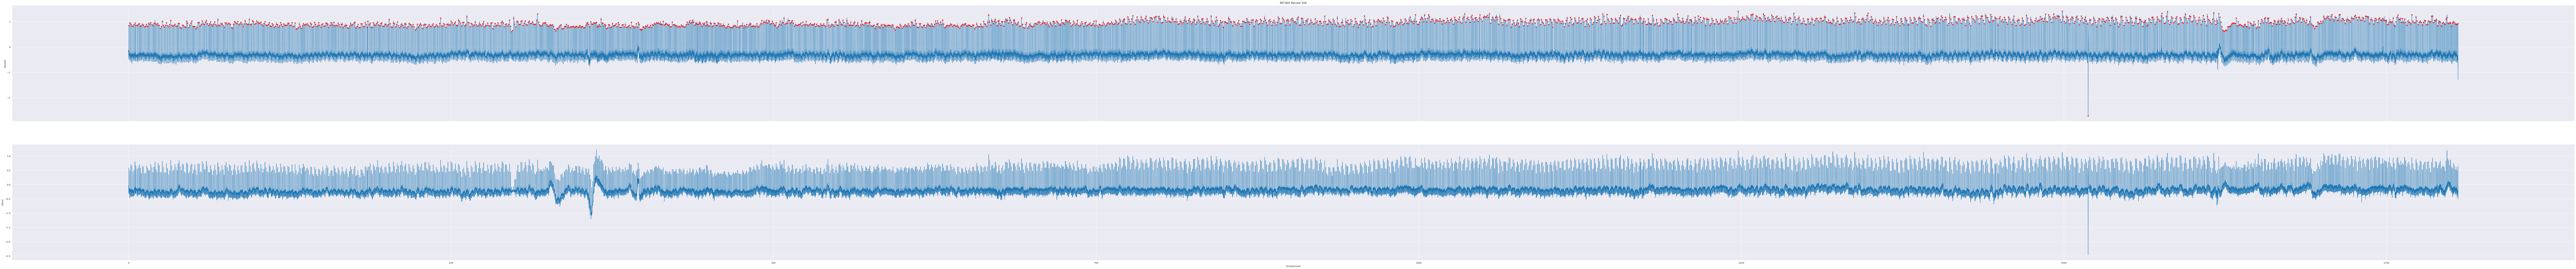

In [10]:
# Plot the signal with annotations
wfdb.plot_wfdb(record=record, annotation=annotation, title='MIT-BIH Record 100', figsize=(200,20))

In [11]:
hundred = record.p_signal[:,0]

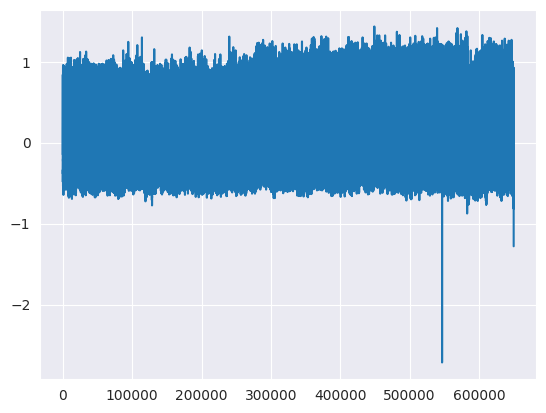

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(hundred)

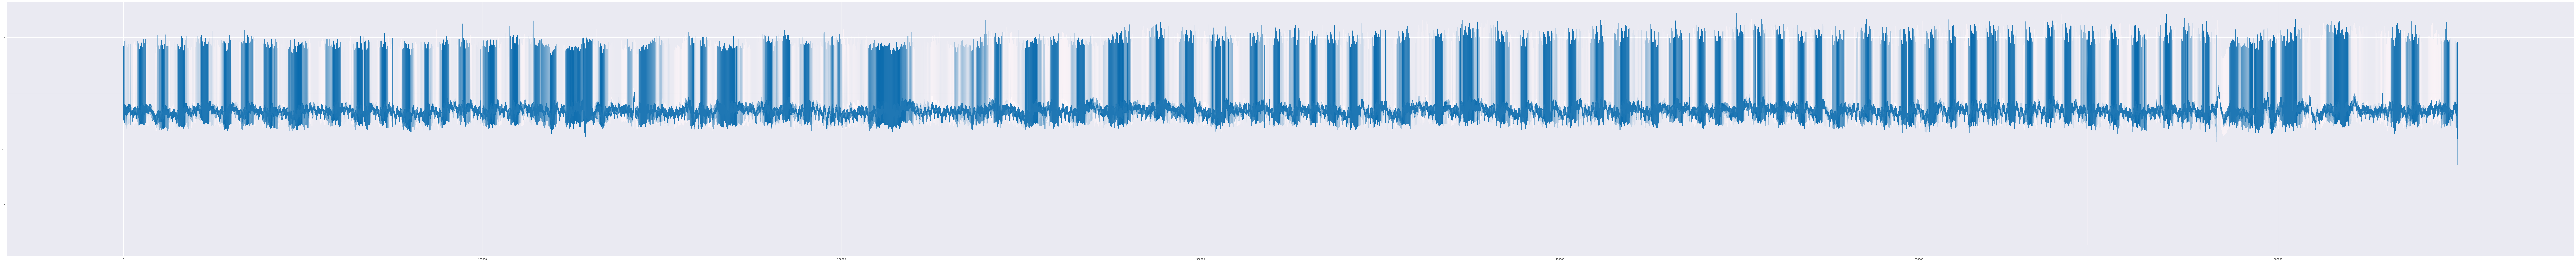

In [22]:
window = int(0.5 * 300)
X = []
y = []

for i, r in enumerate(annotation.sample):
    if r - window < 0 or r + window > len(hundred):
        continue
    segment = hundred[r - window : r + window]
    label = annotation.symbol[i]
    # if label in valid_types:
    X.append(segment)
    y.append(label)

print(len(X), len(y))

2271 2271


In [23]:
import pandas as pd

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [24]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.260,-0.265,-0.270,-0.265,-0.260,-0.275,-0.280,-0.290,-0.275,-0.270,...,-0.310,-0.305,-0.315,-0.305,-0.315,-0.315,-0.310,-0.295,-0.290,-0.305
1,-0.315,-0.305,-0.315,-0.315,-0.310,-0.295,-0.290,-0.305,-0.310,-0.320,...,-0.325,-0.330,-0.320,-0.320,-0.320,-0.325,-0.350,-0.350,-0.340,-0.335
2,-0.320,-0.325,-0.305,-0.310,-0.295,-0.310,-0.325,-0.330,-0.320,-0.320,...,-0.295,-0.300,-0.305,-0.315,-0.310,-0.315,-0.295,-0.300,-0.310,-0.330
3,-0.295,-0.285,-0.300,-0.305,-0.300,-0.295,-0.300,-0.305,-0.315,-0.310,...,-0.305,-0.325,-0.305,-0.300,-0.300,-0.315,-0.325,-0.335,-0.325,-0.315
4,-0.305,-0.300,-0.285,-0.280,-0.290,-0.295,-0.305,-0.325,-0.305,-0.300,...,-0.285,-0.275,-0.275,-0.290,-0.295,-0.305,-0.295,-0.295,-0.285,-0.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,-0.375,-0.360,-0.335,-0.335,-0.340,-0.340,-0.350,-0.330,-0.320,-0.315,...,-0.250,-0.260,-0.265,-0.270,-0.280,-0.275,-0.270,-0.275,-0.280,-0.280
2267,-0.315,-0.315,-0.305,-0.285,-0.275,-0.265,-0.265,-0.265,-0.250,-0.235,...,-0.240,-0.220,-0.230,-0.235,-0.245,-0.255,-0.245,-0.245,-0.245,-0.240
2268,-0.235,-0.225,-0.220,-0.220,-0.215,-0.215,-0.215,-0.205,-0.205,-0.215,...,-0.260,-0.265,-0.270,-0.265,-0.275,-0.260,-0.270,-0.265,-0.275,-0.275
2269,-0.335,-0.310,-0.300,-0.295,-0.295,-0.285,-0.280,-0.265,-0.255,-0.250,...,-0.280,-0.305,-0.315,-0.315,-0.315,-0.310,-0.290,-0.300,-0.315,-0.320


In [21]:
y_df

,0
0,N
1,N
2,N
3,N
4,A
...,...
2261,N
2262,N
2263,N
2264,N
